# 3. Clustering

The goal of clustering is to use _unsupervised_ machine learning methods to assign data points to groups so that the similarity within each group is high and the similarity between groups is low. For example we might want to group customers based on their shopping habits, or transformers based on their behaviour, or pixels in a video corresponding to the same object. _Unsupervised_ refers to the fact that the algorithm attempts to find hidden structure in the data without labels, and is often used for exploratory analysis of the data. This is in contrast to _supervised_ methods, which use labeled data to construct a model that can categorise future data or generate quantitative predictions.

In clustering, there are no predictions made. Rather, clustering methods find the similarities between objects according to a similarity metric, based on the object attributes. Clustering techniques are utilized in marketing, economics, and various branches of science. A popular clustering method is k-means, which has widespread applicability due to its simplicity.

## 3.1 Use Cases

Clustering is often used as an exploratory technique to uncover hidden structure in data. Importantly, breaking a dataset into clusters can reduce the variance of the dataset and identify different behaviours in the data. This means clustering labels introduce valuable information to our dataset and can help us build better models. Popular use-cases for clustering are marketing segmentation, image processing and identifying naturally-occurring patterns in medical datasets.

#### Marketing Segmentation

Clustering algorithms such as k-means can be applied to marketing datasets, including customer attributes such as spending patterns, gender, age and preferences, to identify marketing segments. This insight allows companies to better understand their customer base and target those segments with greater specificity.

#### Image Processing

The k-means algorithm can be applied to successive frames of a video to identify and track objects based on pixel similarity. The pixel data includes x and y coordinates, brightness and colour.

#### Medical

Large biomedical datasets can often have extremely high dimensionality and variance. K-means can help reduce the variance by identifying naturally-occurring clusters in patients.

## 3.2 How do we calculate similarity?

The simplest measure of similarity is the distance between two data points. The smaller the distance the more similar two points are.

Every data point we have is a vector $\mathbf x_i$. For example a house in the `Melbourne_housing` dataset might look like

$$ x_i = [66500,	741,	1,	...] $$

where each value corresponds to a feature i.e. $66500, 741 Square Feet, 1 Bedroom etc. 

We can simply use the vector distance to other data points $\mathbf x_j$ to calculate the similarity. The formula to calculate the distance/similarity for points $i$ and $j$ is then

$$ d(\mathbf x_i, \mathbf x_j) = \| \mathbf x_i - \mathbf x_j \| $$

This is equivalent to the euclidian distance in geometry, as given by Pythagoras' theorem:

$$d = \sqrt{(x_i-x_j)^2+(y_i-y_j)^2+(z_i-z_j)^2+...}$$

Where $x_i$, $y_i$, $z_i$, ... etc are the attributes of data point $i$.

## 3.3 K-Means Clustering

K-means is a very simple clustering method. It performs suprisingly well in practice and its simplicity means that it can be applied to massive datasets with ease.

K-means follows this basic outline:

    1. Set the number of clusters $k$
    2. Initialise a centroid for each cluster (a point representing each cluster)
    3. Assign each data point to its closest centroid (cluster assignment)
    4. Set new centroids as the mean of each cluster
    5. Repeat 3-4 until convergence (no change in cluster assignments)

### 3.3.1 Means

<img width=300 src="img/kmeans.png">

The k-means algorithm works by assigning each point to the cluster defined by its closest _centroid_ , which for now is just some point in our feature space. The closest centroid is determined using the similarity or distance metric from the previous section. The position of the centroid is then updated by taking the mean position of all the points in its cluster. The mean position is calculated by taking the average value of each attribute in the cluster.

$$(c_x,c_y,c_z,...)=\frac{1}{m}\left(\Sigma^m_1x_i, \Sigma^m_1y_i, \Sigma^m_1z_i, ...\right)$$

Where m is the number of datapoints in the cluster. Once the position of the centroid is updated, each datapoint is reassigned to its new closest centroid and the process is repeated.

### 3.3.2 Scaling

In our example from the `Melbourne_housing` dataset, the price variable ($66500) is several orders of magnitude larger than the Bedroom variable (1). This will be a problem when using distance as a similarity metric because differences in price will dominate the similarity metric, while differences in number of bedrooms will only have a very small influence on distance. This would basically result in clustering along a single axis, price.

To avoid this, we need to scale the data. This can be understood as changing the units of the data so that no information is lost, but each variable is measured on a comparable scale. A convenient way of doing this is to centre each variable on 0 and scale it so that it has a standard deviation of 1.

$$x_{scaled} = \frac{x - mean(x)}{ std(x)}$$

This particular method of scaling is referred to as *standardisation* or *z-score normalisation*. Typically, the data is scaled only for analytical purposes, and the cluster assignments can be added back to the original dataset in its original units once the analysis is complete.

To illustrate the effect this has on clustering, take the example of the dataset below. In the top image, the variance of the data along the $y$ axis is an order of magnitude smaller than the variance along the $x$ axis. In these units, clustering occurs primarily along the $x$ axis and the algorithm fails to identify the clear structure in the dataset. In the bottom image, the units are scaled before running the kmeans algorithm so that the variance of both variables is equally significant and centred at 0. As a result, the k-means algorithm is able to identify the appropriate clusters.

<img width=400 src="img/scaling.png">

## 3.4 K-Means Clustering in R

K-Means Clustering with R straightforward

### 3.4.1 Example

The `iris` dataset is another dataset that's built in to base R. We can load it again using the `data()` function.

In [1]:
data(iris)
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


This dataset contains five attributes: `Sepal.Length`, `Sepal.Width`, `Petal.Length`, `Petal.Width` and `Species`. The first four of these columns are numeric and can be used in the kmeans algorithm. The species label is categorical, and thus cannot be used in distance calculations. We will need to remove this column for our analysis.

In [2]:
df <- iris[,1:4]

Next we will need to scale our data, to make sure that none of the attributes dominates in the kmeans algorithm. We can use the `scale()` function, which returns a matrix of scaled values. We can then use `as.data.frame()` to convert this back to a dataframe object.

In [3]:
df_scaled <- as.data.frame(scale(df))
head(df_scaled)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
<dbl>,<dbl>,<dbl>,<dbl>
-0.8976739,1.01560199,-1.335752,-1.311052
-1.1392005,-0.13153881,-1.335752,-1.311052
-1.3807271,0.32731751,-1.392399,-1.311052
-1.5014904,0.09788935,-1.279104,-1.311052
-1.0184372,1.24503015,-1.335752,-1.311052
-0.5353840,1.93331463,-1.165809,-1.048667


Now let's use the `kmeans()` function to run the k-means algorithm on the scaled dataset. We will set $k=3$ as a naive guess.

In [4]:
# Run the kmeans algorithm
model <- kmeans(df_scaled, 3)
# Print cluster assignments
model$cluster

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 2 2 2 3 2 2 2 2 2 2 2 2 3 2 2 2 2 3 2 2 2
 [75] 2 3 3 3 2 2 2 2 2 2 2 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 3 3 3 2 3 3 3 3
[112] 3 3 2 2 3 3 3 3 2 3 2 3 2 3 3 2 3 3 3 3 3 3 2 2 3 3 3 2 3 3 3 2 3 3 3 2 3
[149] 3 2

Now our cluster assignments are contained in the `model` object as the attribute `cluster`. This is a vector of integers corresponding to the cluster number for each observation in the iris dataset. We can refer to the them using `model$cluster`. Let's produce a pairplot of our numerical variables using the `pairs()` function. We will use the cluster assignments as the `col` parameter, so that each cluster will be coloured differently.

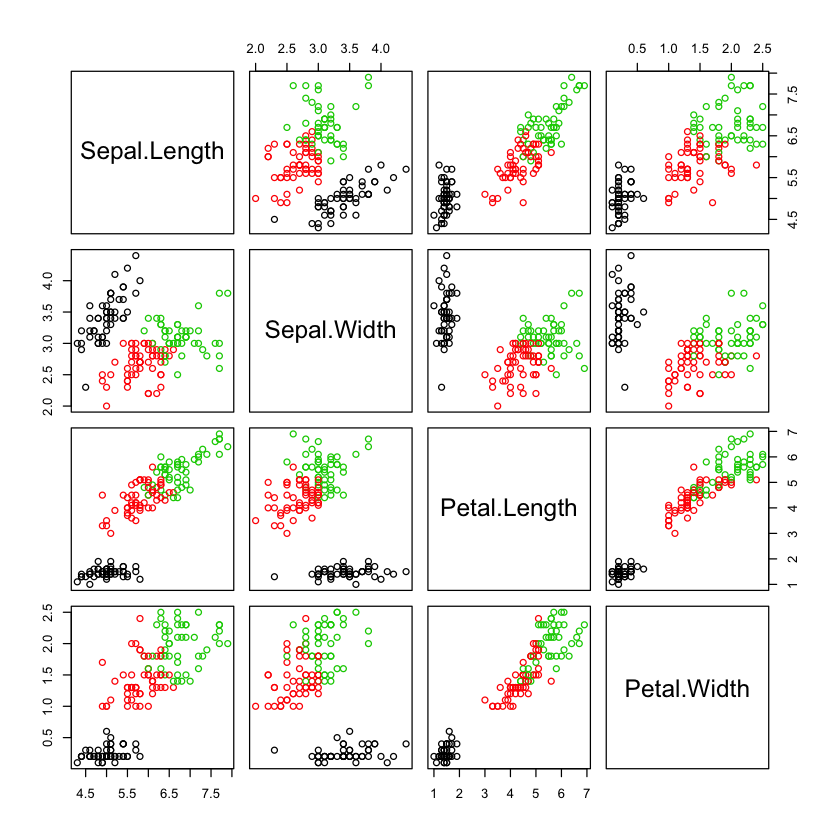

In [5]:
pairs(df, col=model$cluster)

Now, for fun, let's repeat that plot using the original species column as the `col` parameter instead of the cluster assignments, so that datapoints are coloured by species. Do you notice anything interesting?

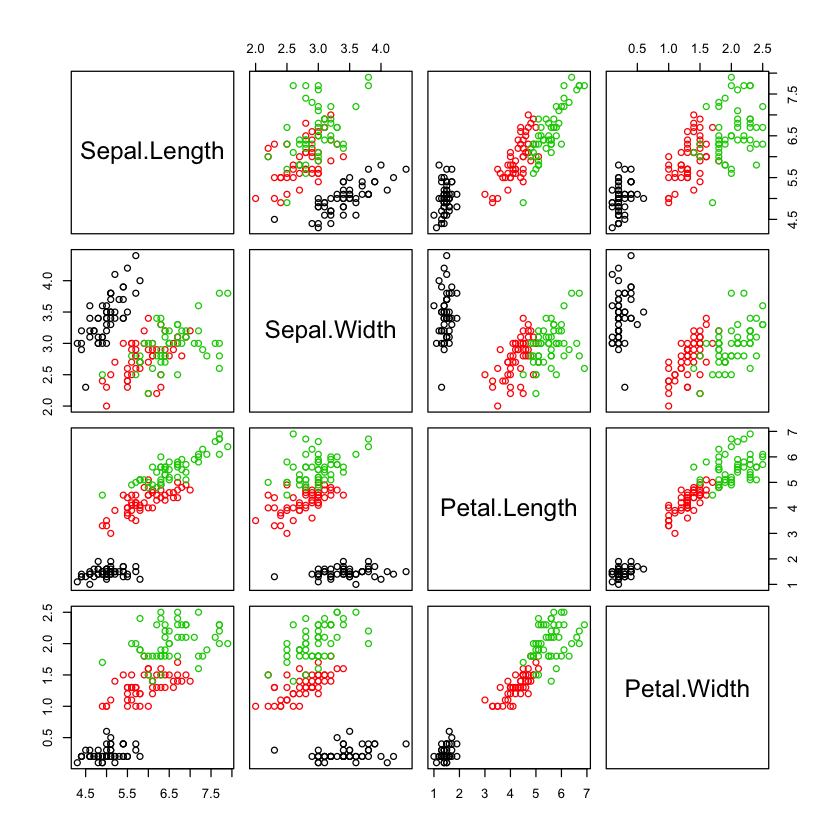

In [6]:
pairs(iris[,1:4], col=iris$Species)

The two plots are superimposable! The clustering algorithm has successfully identified the three types of Iris in our dataset with an impressive accuracy.

### 3.4.2 Sensitivity to Initialisation

One problem with k-means is that the initialisation of centroids can influence the solution. The k-means algorithm If a bad guess is used for the initial centroids then the clustering might be poor. In some cases it might be worthwhile repeating k-means many times to find the mean or median cluster assignment or use a heuristic to measure cluster quality.

Fortunately in R the initialisation is smarter than random initialisation so the cluster quality is usually quite good.

### 3.4.3 Measuring Cluster Quality

There are many ways to measure the quality of clustering. One heuristic is called the Within Cluster Sum of Squares (WSS), which is a measure of all of the distances between points in a cluster, with large destances proportionally weighted. A small WSS indicates good clustering, while a large WSS indicates a poor cluster quality.

### 3.4.4 Selecting k

$k$ is a hyperparameter that we must set ahead of time. Either we know how many clusters there are or we must estimate it. We can test a range of values for k and choose the value of k with the best cluster quality or smallest WSS, however for $k=n$ with n datapoints, the WSS can fall to 0 and the clustering adds no new information.

Instead, we use the **elbow method** to estimate k by finding the value of k where the cluster quality stops significantly improving. The procedure is:

1. Set a range of $k$ values
2. Perform k-means for each value of k
    1. Calculate cluster quality
3. Find the point at which cluster quality doesn't improve significantly

To implement the elbow method on the iris dataset we can use the loop below, varying the variable k_max to change the maximum value for the range of k:

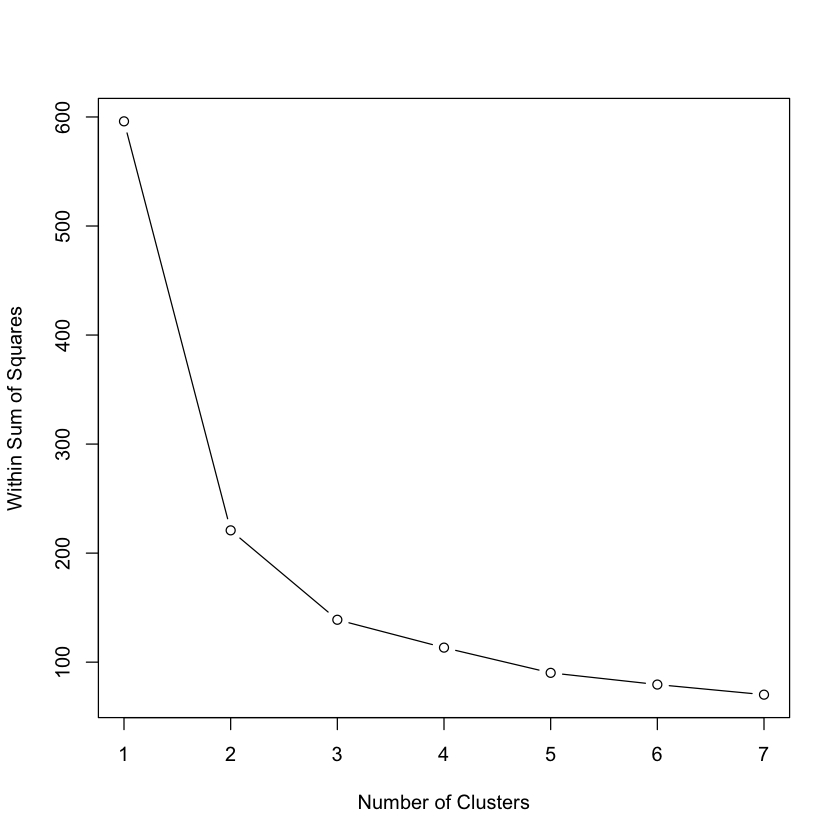

In [7]:
k_max <- 7
wss <- numeric(k_max)
for (k in 1:k_max) wss[k] <- sum(kmeans(df_scaled, centers=k, nstart=25)$withinss)

plot(1:k_max, wss, type="b", xlab="Number of Clusters", ylab="Within Sum of Squares")

The 'elbow' is around 3 clusters, since beyond that the cluster quality fails to improve considerably. Ths confirms that our choice of $k=3$ was appropriate for the dataset.

## 3.5 Some Other Clustering Algorithms

One limitation of k-means is that it can only distinguish clusters that are **linearly separable**, or can be separated by a straight line. That's because k-means uses the distance from a centroid to determine cluster assignments, and the set of points that are equidistant from two centroids (the separating line between clusters) is a straight line. When clusters are nonlinear, k-means tends to fail, as shown in the below examples.


<img width=400 src="img/kmeans-failure.png">

In the case on the left, not only are the clusters not linearly separable, but each circular cluster is centred on the same point! That means the average position of each cluster will be virtually identical, which is an issue for k-means since the centroids for the clusters are the same.

In the failure case on the right, not only are the clusters not linearly separable, but the shape of the clusters is non-convex, meaning the interior angles of the shapes are not all less than 180°. This is another situation where k-means clustering can fail.

Many other clustering algorithms exist that can overcome these hurdles, we cover some of them here.

### 3.5.1 Expectation–Maximization (EM) Clustering using Gaussian Mixture Models (GMM)

With GMMs we assume that the data points are Gaussian distributed; this is a less restrictive assumption than saying they are circular by using the mean. That way, we have two parameters to describe the shape of the clusters: the mean and the standard deviation! Taking an example in two dimensions, this means that the clusters can take any kind of elliptical shape (since we have standard deviation in both the x and y directions). Thus, each Gaussian distribution is assigned to a single cluster.

In order to find the parameters of the Gaussian for each cluster (e.g the mean and standard deviation) we will use an optimization algorithm called Expectation–Maximization (EM).

### 3.5.2 Agglomerative Hierarchical Clustering

Hierarchical clustering algorithms actually fall into 2 categories: top-down or bottom-up. Bottom-up algorithms treat each data point as a single cluster at the outset and then successively merge (or agglomerate) pairs of clusters until all clusters have been merged into a single cluster that contains all data points. Bottom-up hierarchical clustering is therefore called hierarchical agglomerative clustering or HAC. Top-down hierarchical clustering works in precisely the opposite way!

### 3.5.3 Mean-Shift Clustering

Mean shift clustering is a sliding-window-based algorithm that attempts to find dense areas of data points. It is a centroid-based algorithm meaning that the goal is to locate the center points of each group/class, which works by updating candidates for center points to be the mean of the points within the sliding-window. These candidate windows are then filtered in a post-processing stage to eliminate near-duplicates, forming the final set of center points and their corresponding groups.

### 3.5.4 Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

DBSCAN is a density-based clustering non-parametric algorithm: given a set of points in some space, it groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions (whose nearest neighbors are too far away). DBSCAN is one of the most common clustering algorithms and also most cited in scientific literature.

The table below compares the performance and runtimes of various clustering algorithms applied to qualitatively different datasets.

<img width=700 src="img/cluster-table.png">